<a href="https://colab.research.google.com/github/Kunaltembhare003/Cardiovascular-heart-diseases/blob/main/Cardiovascular_heart_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/alma_better/capstone_project/Cardiovascular_Risk_Prediction/data_cardiovascular_risk.csv")

In [ ]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.shape

(3390, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


#univariant analsysis

In [ ]:
#size of graph
plt.rcParams["figure.figsize"] = [10,6]

##column 2: age 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


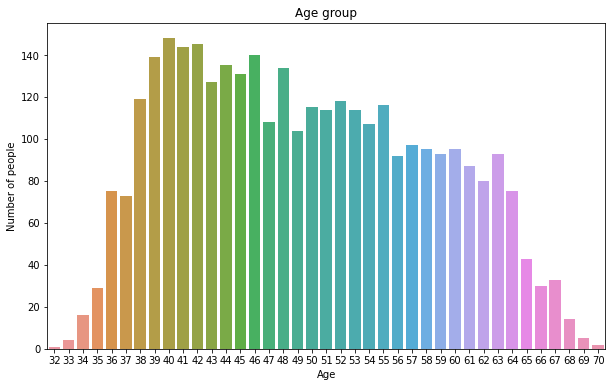

In [ ]:
sns.countplot(df.age)
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.title("Age group")
plt.show()

##coloum 3: education

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


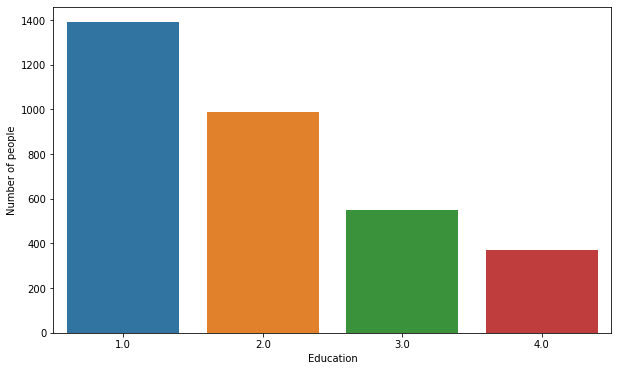

In [ ]:
sns.countplot(df.education)
plt.xlabel("Education")
plt.ylabel("Number of people")
plt.show()

##column : is smoking

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


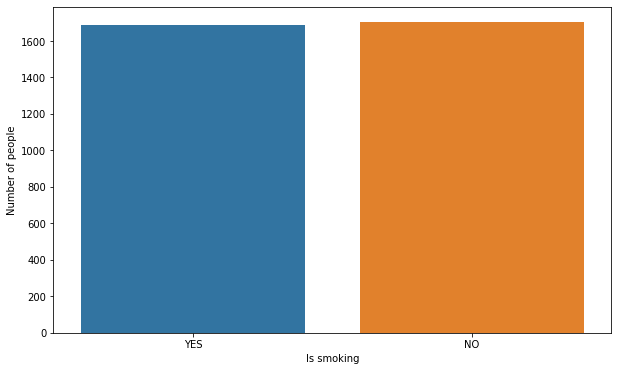

In [ ]:
sns.countplot(df.is_smoking)
plt.xlabel("Is smoking")
plt.ylabel("Number of people")
plt.show()

##column 4: CigsperDay

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


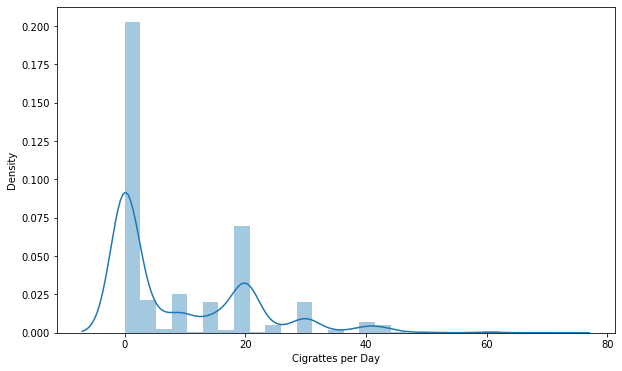

In [ ]:
sns.distplot(df.cigsPerDay)
plt.xlabel("Cigrattes per Day")
#plt.ylabel("Number of people")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


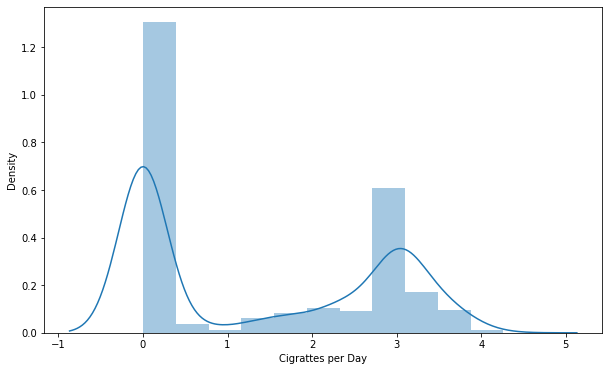

In [ ]:
sns.distplot(np.log1p(df.cigsPerDay))
plt.xlabel("Cigrattes per Day")
#plt.ylabel("Number of people")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


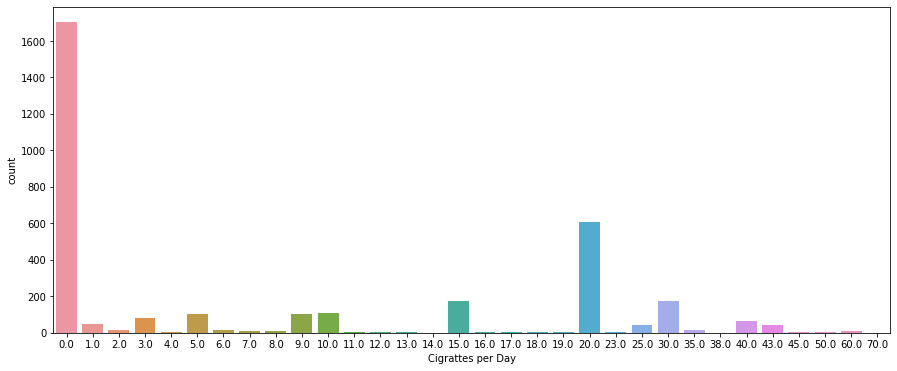

In [ ]:
plt.rcParams["figure.figsize"] = [15,6]
sns.countplot(df.cigsPerDay)
plt.xlabel("Cigrattes per Day")
#plt.ylabel("Number of people")
plt.show()

##coloumn 5: BPmeds

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


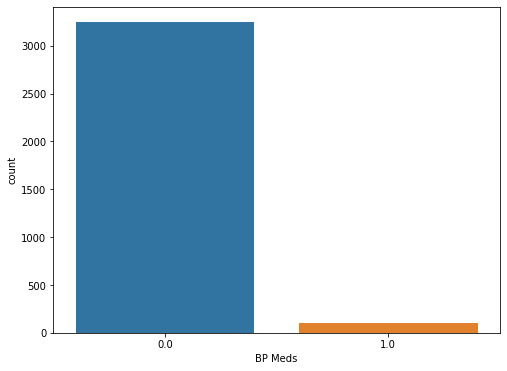

In [ ]:
plt.rcParams["figure.figsize"] = [8,6]
sns.countplot(df.BPMeds)
plt.xlabel("BP Meds")
plt.show()

## columns 6: Prevalent Strokes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


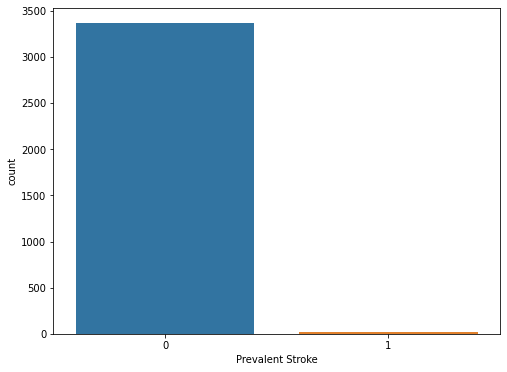

In [ ]:
sns.countplot(df.prevalentStroke)
plt.xlabel("Prevalent Stroke")
plt.show()

## column 7: Prevalent hyp

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


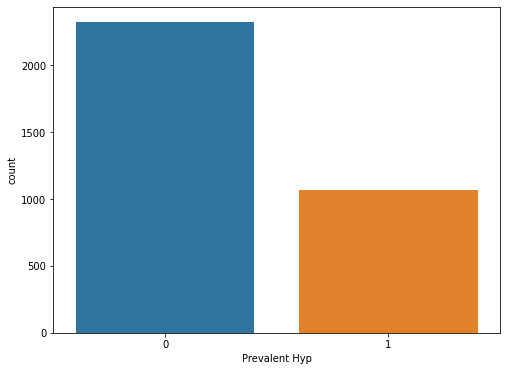

In [ ]:
sns.countplot(df.prevalentHyp)
plt.xlabel("Prevalent Hyp")
plt.show()

## columns 8: Diabetes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


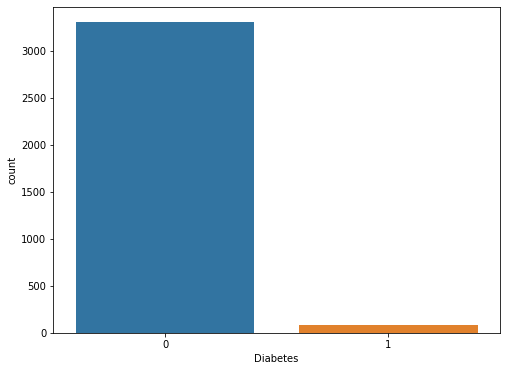

In [ ]:
sns.countplot(df.diabetes)
plt.xlabel("Diabetes")
plt.show()

## Columns 9: totChol

In [ ]:
df.totChol.describe([0.50,0.75,0.90,0.95,0.99])

count    3352.000000
mean      237.074284
std        45.247430
min       107.000000
50%       234.000000
75%       264.000000
90%       292.000000
95%       313.450000
99%       355.490000
max       696.000000
Name: totChol, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


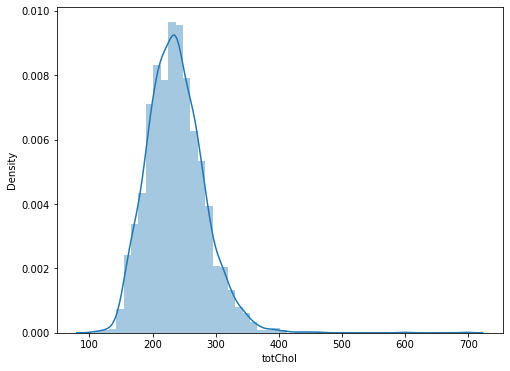

In [ ]:
sns.distplot(df.totChol )
plt.xlabel("totChol")
plt.show()

## coloumns 9: sysBP

In [ ]:
df.sysBP.describe([0.50,0.75,0.90,0.95,0.99])

count    3390.00000
mean      132.60118
std        22.29203
min        83.50000
50%       128.50000
75%       144.00000
90%       162.50000
95%       175.27500
99%       202.05500
max       295.00000
Name: sysBP, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


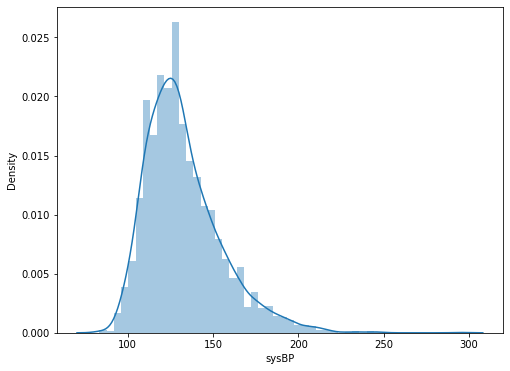

In [ ]:
sns.distplot(df.sysBP )
plt.xlabel("sysBP")
plt.show()

##columns 10: diaBP

In [ ]:
df.diaBP.describe([0.50,0.75,0.90,0.95,0.99])

count    3390.000000
mean       82.883038
std        12.023581
min        48.000000
50%        82.000000
75%        90.000000
90%        98.000000
95%       105.000000
99%       119.110000
max       142.500000
Name: diaBP, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


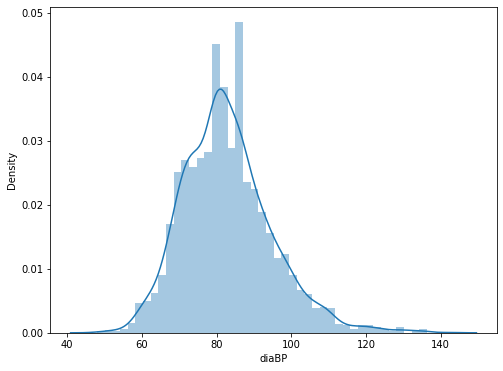

In [ ]:
sns.distplot(df.diaBP )
plt.xlabel("diaBP")
plt.show()

##coloumns 11: BMI

In [ ]:
df.BMI.describe([0.50,0.75,0.90,0.95,0.99])

count    3376.000000
mean       25.794964
std         4.115449
min        15.960000
50%        25.380000
75%        28.040000
90%        30.875000
95%        32.852500
99%        38.855000
max        56.800000
Name: BMI, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


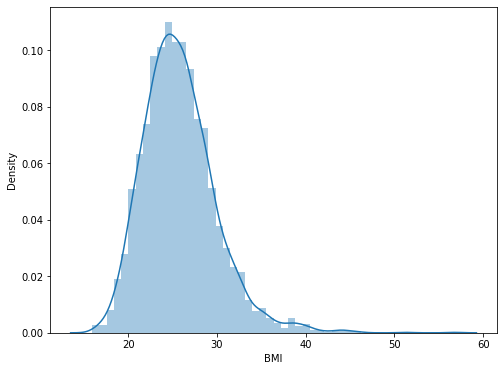

In [ ]:
sns.distplot(df.BMI )
plt.xlabel("BMI")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


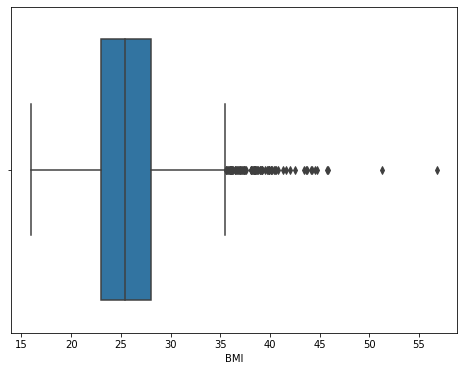

In [ ]:
sns.boxplot(df.BMI )
plt.xlabel("BMI")
plt.show()

## coloumns 12: HeartRate

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


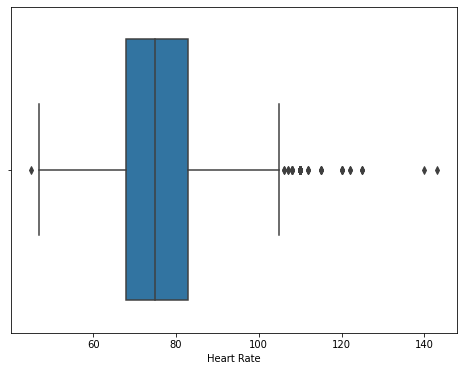

In [ ]:
sns.boxplot(df.heartRate )
plt.xlabel("Heart Rate")
plt.show()

In [ ]:
df.heartRate.describe([0.50,0.75,0.90,0.95,0.99])

count    3389.000000
mean       75.977279
std        11.971868
min        45.000000
50%        75.000000
75%        83.000000
90%        92.000000
95%        98.000000
99%       110.000000
max       143.000000
Name: heartRate, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


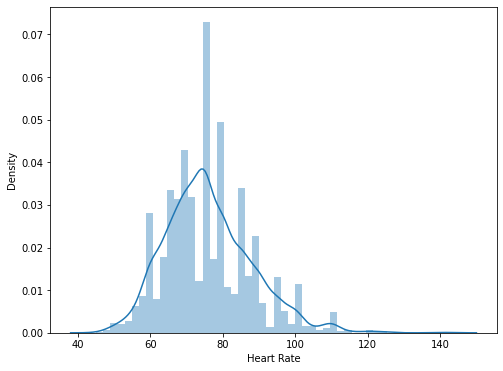

In [ ]:
sns.distplot(df.heartRate )
plt.xlabel("Heart Rate")
plt.show()

##columns 13: Glucose

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


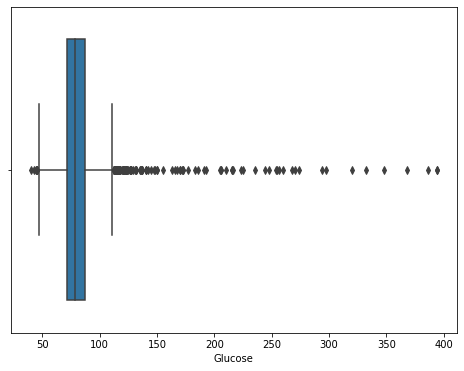

In [ ]:
sns.boxplot(df.glucose )
plt.xlabel("Glucose")
plt.show()

In [ ]:
df.glucose.describe([0.50,0.75,0.90,0.95,0.99])

count    3086.000000
mean       82.086520
std        24.244753
min        40.000000
50%        78.000000
75%        87.000000
90%        98.000000
95%       110.000000
99%       183.450000
max       394.000000
Name: glucose, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


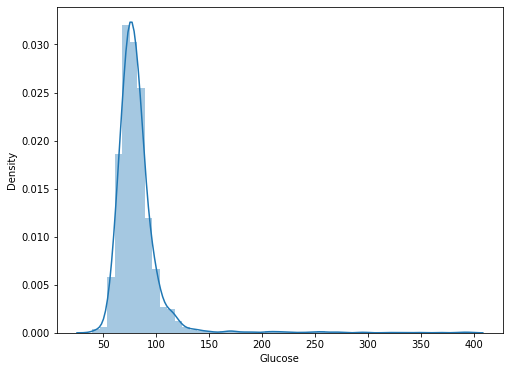

In [ ]:
sns.distplot(df.glucose)
plt.xlabel("Glucose")
plt.show()

## coloumns 14:  TenyearCHD

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


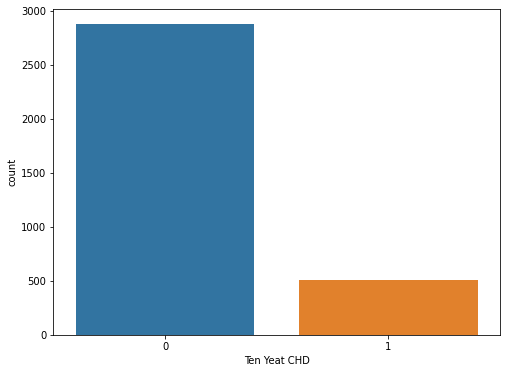

In [ ]:
sns.countplot(df.TenYearCHD)
plt.xlabel("Ten Yeat CHD")
plt.show()

#bivariant analysis

## Age Vs TenYearCHD

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


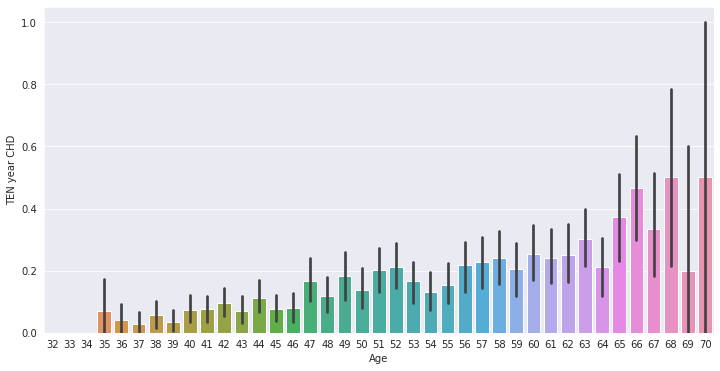

In [ ]:
sns.set_style(style='darkgrid')
plt.figure(figsize = (12,6))
sns.barplot(df.age,df.TenYearCHD)
plt.xlabel('Age')
plt.ylabel('TEN year CHD')
plt.show()

## educaation Vs Ten Year CHD

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


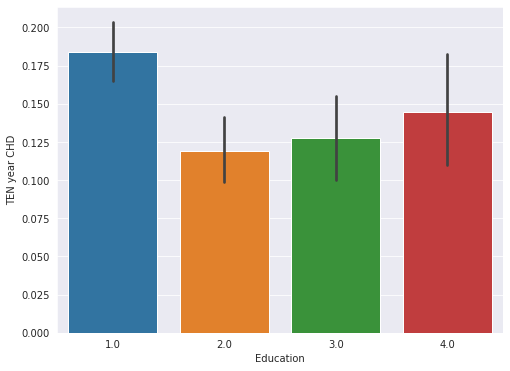

In [ ]:
sns.barplot(df.education,df.TenYearCHD)
plt.xlabel('Education')
plt.ylabel('TEN year CHD')
plt.show()

## sex Vs Ten Year CHD

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


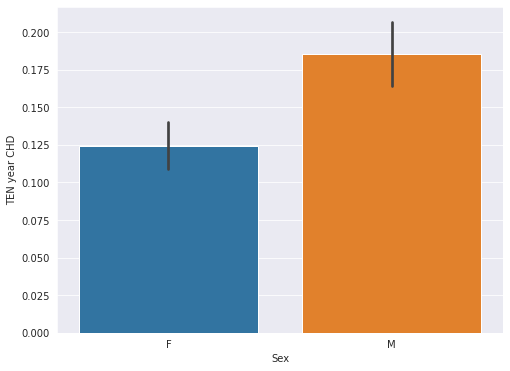

In [ ]:
sns.barplot(df.sex,df.TenYearCHD)
plt.xlabel('Sex')
plt.ylabel('TEN year CHD')
plt.show()

## is_smoking Vs Ten year CHD

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


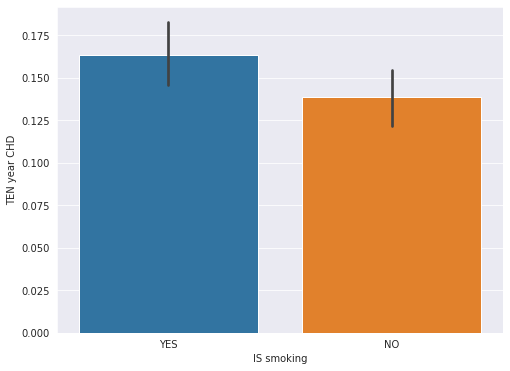

In [ ]:
sns.barplot(df.is_smoking,df.TenYearCHD)
plt.xlabel('IS smoking')
plt.ylabel('TEN year CHD')
plt.show()

##cigratesperday Vs Ten year CHD

Text(0.5, 1.0, 'Line Plot')

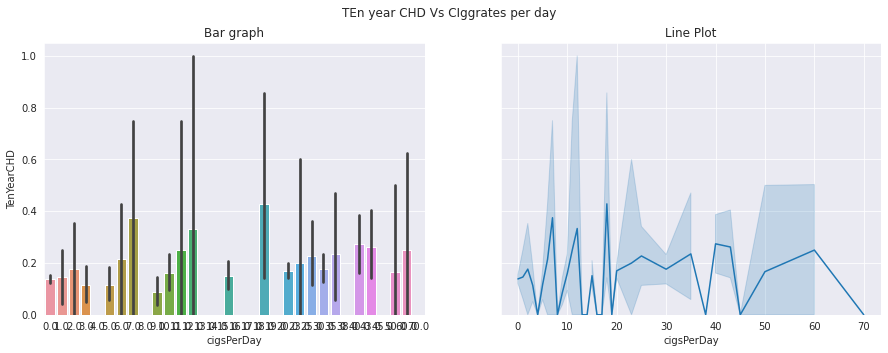

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('TEn year CHD Vs CIggrates per day')

sns.barplot(ax=axes[0], x='cigsPerDay',y='TenYearCHD',data=df)
axes[0].set_title('Bar graph')

sns.lineplot(ax=axes[1],  x='cigsPerDay',y='TenYearCHD',data=df)
axes[1].set_title('Line Plot')

## BPMeds Vs TenYearCHD

In [ ]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


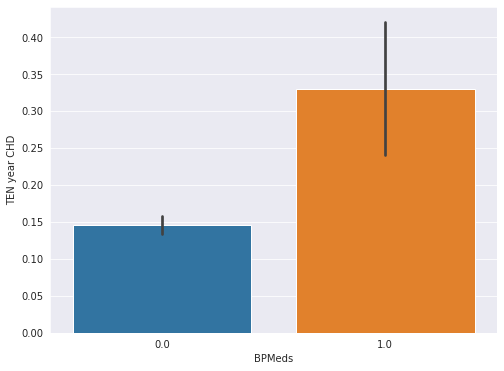

In [ ]:
sns.barplot(df.BPMeds,df.TenYearCHD)
plt.xlabel('BPMeds')
plt.ylabel('TEN year CHD')
plt.show()

## prevalentStrokes Vs TenYearCHD

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


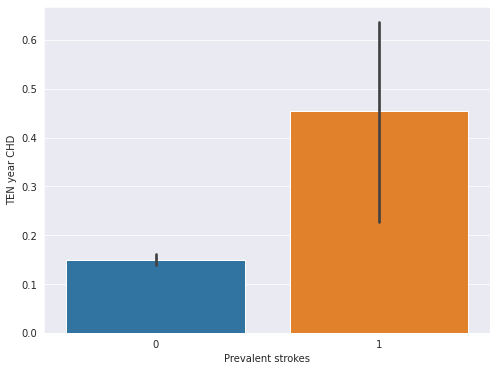

In [ ]:
sns.barplot(df.prevalentStroke,df.TenYearCHD)
plt.xlabel('Prevalent strokes')
plt.ylabel('TEN year CHD')
plt.show()

##prevalentHyp Vs TenYearCHD

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


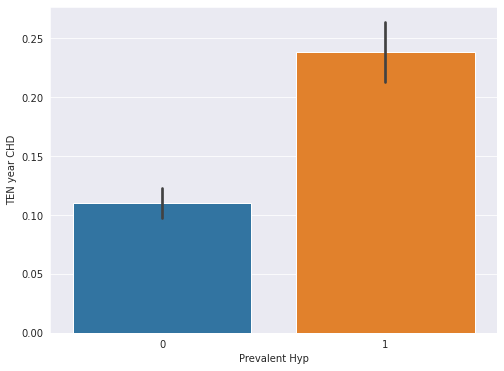

In [ ]:
sns.barplot(df.prevalentHyp,df.TenYearCHD)
plt.xlabel('Prevalent Hyp')
plt.ylabel('TEN year CHD')
plt.show()

##diabetes Vs TenYearCHD

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


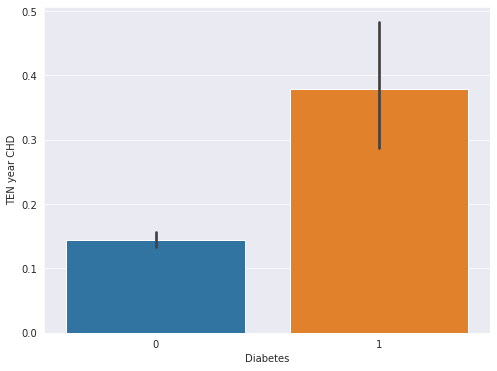

In [ ]:
sns.barplot(df.diabetes,df.TenYearCHD)
plt.xlabel('Diabetes')
plt.ylabel('TEN year CHD')
plt.show()

## TOTChol Vs TenYearCHD

Text(0.5, 1.0, 'Line Plot')

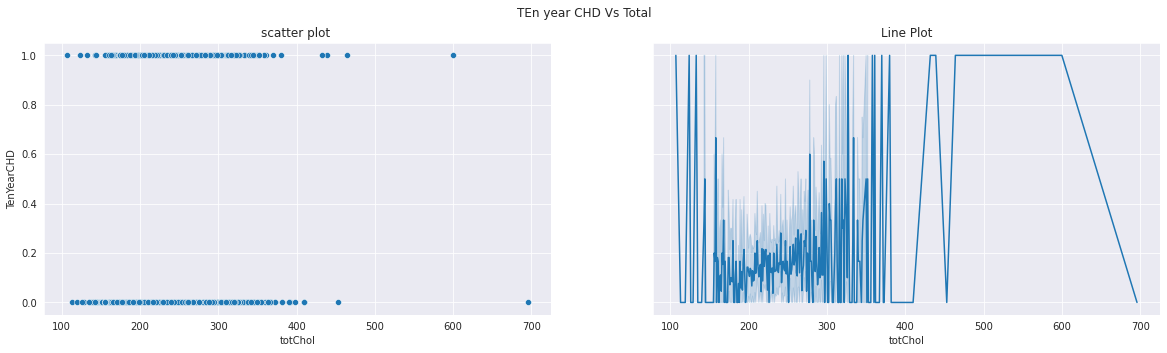

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('TEn year CHD Vs Total')

sns.scatterplot(ax=axes[0], x='totChol',y='TenYearCHD',data=df)
axes[0].set_title('scatter plot ')

sns.lineplot(ax=axes[1],  x='totChol',y='TenYearCHD',data=df)
axes[1].set_title('Line Plot')

##sysBP Vs TenYearCHD

In [ ]:
df.sysBP.describe()

count    3390.00000
mean      132.60118
std        22.29203
min        83.50000
25%       117.00000
50%       128.50000
75%       144.00000
max       295.00000
Name: sysBP, dtype: float64

Text(0.5, 1.0, 'Line Plot')

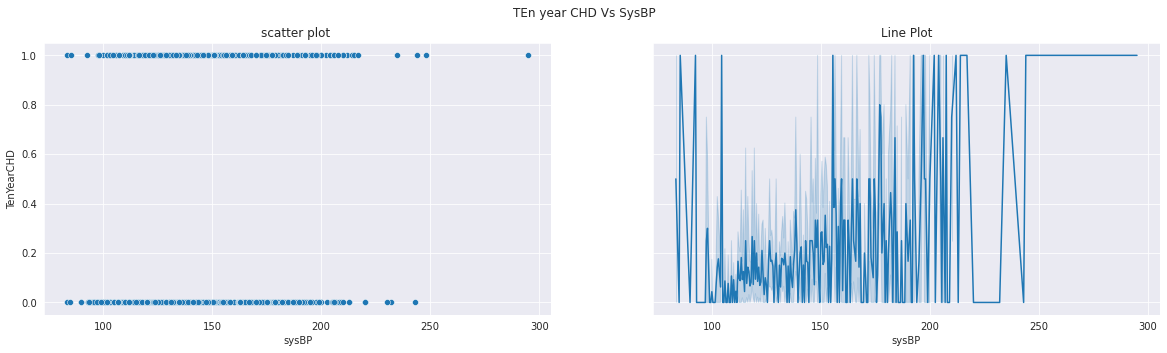

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('TEn year CHD Vs SysBP')

sns.scatterplot(ax=axes[0], x='sysBP',y='TenYearCHD',data=df)
axes[0].set_title('scatter plot ')

sns.lineplot(ax=axes[1],  x='sysBP',y='TenYearCHD',data=df)
axes[1].set_title('Line Plot')

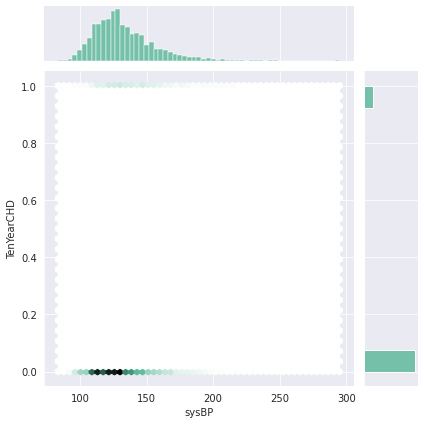

In [ ]:
sns.jointplot(x=df.sysBP, y=df.TenYearCHD, kind="hex", color="#4CB391")


##diaBP Vs TenYearCHD

Text(0.5, 1.0, 'joint plot ')

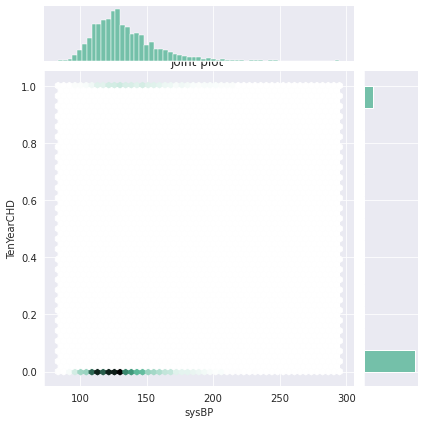

In [ ]:
sns.jointplot(x=df.sysBP, y=df.TenYearCHD, kind="hex", color="#4CB391")
plt.title('joint plot ')

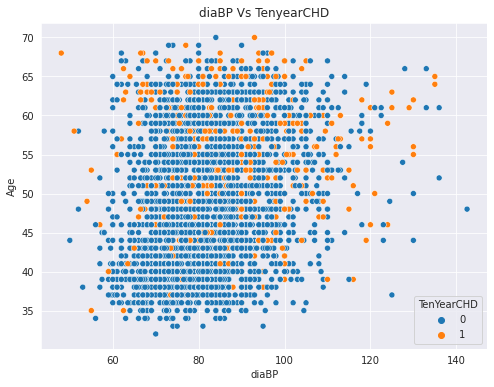

In [ ]:
sns.scatterplot(x = "diaBP", y = "age",data=df, hue='TenYearCHD')
plt.xlabel('diaBP')
plt.ylabel('Age')
plt.title("diaBP Vs TenyearCHD")
plt.show()

##BMI Vs TenYearCHD

Text(0.5, 1.0, 'Line Plot')

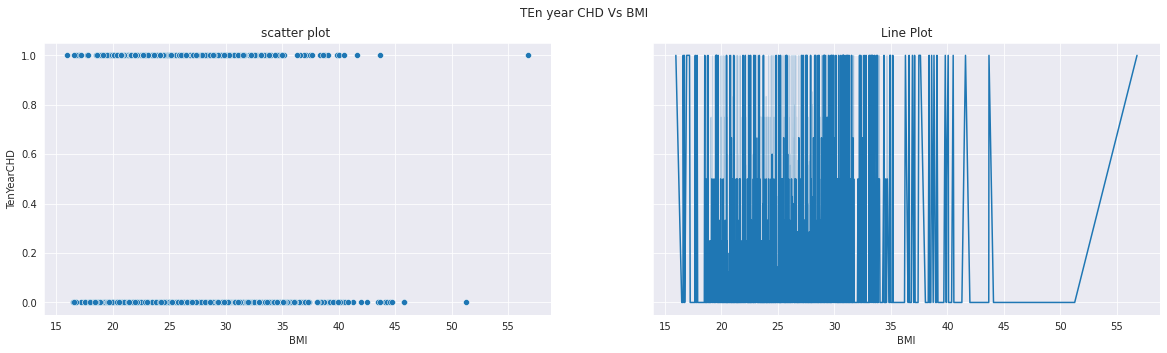

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.suptitle('TEn year CHD Vs BMI')

sns.scatterplot(ax=axes[0], x='BMI',y='TenYearCHD',data=df)
axes[0].set_title('scatter plot ')

sns.lineplot(ax=axes[1],  x='BMI',y='TenYearCHD',data=df)
axes[1].set_title('Line Plot')

##BMI Vs TenYearCHD

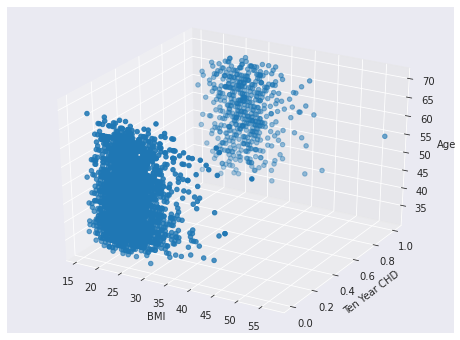

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


ax.scatter(df.BMI, df.TenYearCHD, df.age)
ax.set_xlabel("BMI")
ax.set_ylabel("Ten Year CHD")
ax.set_zlabel("Age")

plt.show()


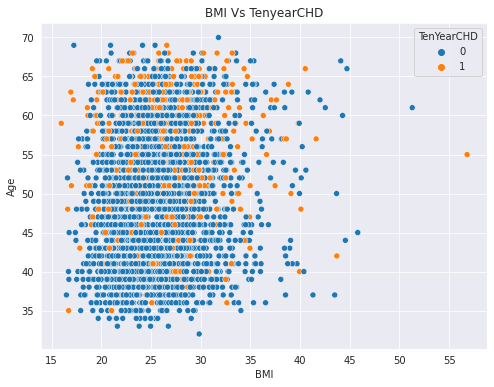

In [ ]:
sns.scatterplot(x = "BMI", y = "age",data=df, hue='TenYearCHD')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.title("BMI Vs TenyearCHD")
plt.show()

## heartRate Vs TenYearCHD

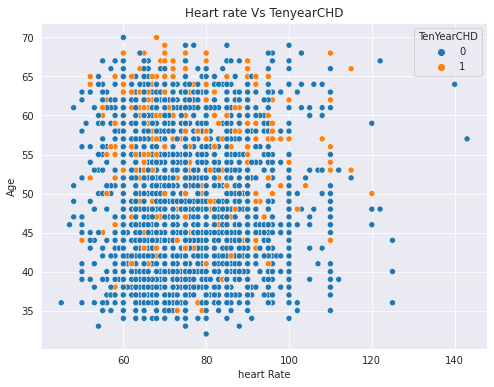

In [ ]:
sns.scatterplot(x = "heartRate", y = "age",data=df, hue='TenYearCHD')
plt.xlabel('heart Rate')
plt.ylabel('Age')
plt.title("Heart rate Vs TenyearCHD")
plt.show()

##  Glucose Vs TenYearCHD

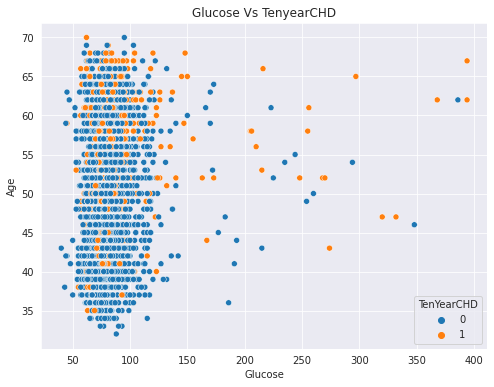

In [ ]:
sns.scatterplot(x = "glucose", y = "age",data=df, hue='TenYearCHD')
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.title("Glucose Vs TenyearCHD")
plt.show()

In [ ]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

##Null value treatment

In [ ]:
df_copy = df.copy()

In [ ]:
# Missing Value Count Function
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


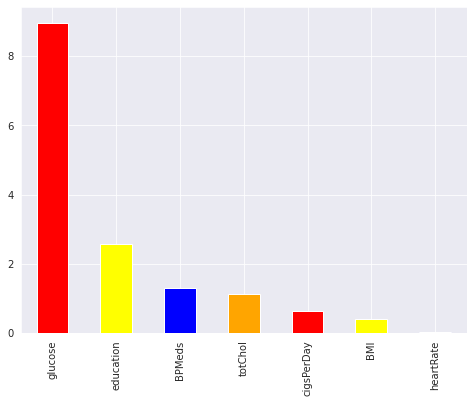

In [ ]:
round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2).plot(kind='bar', color=['red', 'yellow', 'blue', 'orange'])

**Glucose**

In the following column mean and median are nearby. we have fill the missing values so i am using median values for filling the missing values.

In [ ]:
df['glucose'].describe()

count    3086.000000
mean       82.086520
std        24.244753
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [ ]:
print('Glucose Feature Missing Before')
print(df_copy[['glucose']].isnull().sum())
print('--'*50)
df_copy['glucose']=df_copy['glucose'].fillna(df_copy['glucose'].median())
print('Glucose Feature Missing After')
print(df_copy[['glucose']].isnull().sum())
print('--'*50)

Glucose Feature Missing Before
glucose    304
dtype: int64
----------------------------------------------------------------------------------------------------
Glucose Feature Missing After
glucose    0
dtype: int64
----------------------------------------------------------------------------------------------------


**Education**

In [ ]:
df['education'].describe()

count    3303.000000
mean        1.970936
std         1.019081
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: education, dtype: float64

In [ ]:
df['education'].unique()

array([ 2.,  4.,  1.,  3., nan])

Education feature is not a continues variable so we using Mode for filling the missing values.

In [ ]:
print('Education Feature Missing Before')
print(df_copy[['education']].isnull().sum())
print('--'*50)
df_copy['education']=df_copy['education'].fillna(df_copy['education'].mode()[0])
print('Education Feature Missing After')
print(df_copy[['education']].isnull().sum())
print('--'*50)

Education Feature Missing Before
education    87
dtype: int64
----------------------------------------------------------------------------------------------------
Education Feature Missing After
education    0
dtype: int64
----------------------------------------------------------------------------------------------------


**BPMeds**

In [ ]:
df['BPMeds'].describe()

count    3346.000000
mean        0.029886
std         0.170299
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64

In [ ]:
df['BPMeds'].unique()

array([ 0., nan,  1.])

In [ ]:
print('BPMeds Feature Missing Before')
print(df_copy[['BPMeds']].isnull().sum())
print('--'*50)
df_copy['BPMeds']=df_copy['BPMeds'].fillna(df_copy['BPMeds'].mode()[0])
print('BPMeds Feature Missing After')
print(df_copy[['BPMeds']].isnull().sum())
print('--'*50)

BPMeds Feature Missing Before
BPMeds    44
dtype: int64
----------------------------------------------------------------------------------------------------
BPMeds Feature Missing After
BPMeds    0
dtype: int64
----------------------------------------------------------------------------------------------------


**Total Cholostral**

In [ ]:
df['totChol'].describe()

count    3352.000000
mean      237.074284
std        45.247430
min       107.000000
25%       206.000000
50%       234.000000
75%       264.000000
max       696.000000
Name: totChol, dtype: float64

In [ ]:
print('Total colostrol Feature Missing Before')
print(df_copy[['totChol']].isnull().sum())
print('--'*50)
df_copy['totChol']=df_copy['totChol'].fillna(df['totChol'].median())
print('Total colostrol Feature Missing After')
print(df_copy[['totChol']].isnull().sum())
print('--'*50)

Total colostrol Feature Missing Before
totChol    38
dtype: int64
----------------------------------------------------------------------------------------------------
Total colostrol Feature Missing After
totChol    0
dtype: int64
----------------------------------------------------------------------------------------------------


**Cigrates per Day**

In [ ]:
df['cigsPerDay'].describe()

count    3368.000000
mean        9.069477
std        11.879078
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [ ]:
print('Cigars per day Feature Missing Before')
print(df_copy[['cigsPerDay']].isnull().sum())
print('--'*50)
df_copy['cigsPerDay']=df_copy['cigsPerDay'].fillna(df['cigsPerDay'].median())
print('Cigars per day Feature Missing After')
print(df_copy[['cigsPerDay']].isnull().sum())
print('--'*50)

Cigars per day Feature Missing Before
cigsPerDay    22
dtype: int64
----------------------------------------------------------------------------------------------------
Cigars per day Feature Missing After
cigsPerDay    0
dtype: int64
----------------------------------------------------------------------------------------------------


**Body Mass Index(BMI)**

In [ ]:
df['BMI'].describe()

count    3376.000000
mean       25.794964
std         4.115449
min        15.960000
25%        23.020000
50%        25.380000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

In [ ]:
print('BMI Feature Missing Before')
print(df_copy[['BMI']].isnull().sum())
print('--'*50)
df_copy['BMI']=df_copy['BMI'].fillna(df['BMI'].median())
print('BMI Feature Missing After')
print(df_copy[['BMI']].isnull().sum())
print('--'*50)

BMI Feature Missing Before
BMI    14
dtype: int64
----------------------------------------------------------------------------------------------------
BMI Feature Missing After
BMI    0
dtype: int64
----------------------------------------------------------------------------------------------------


**Heart rate**

In [ ]:
df_copy['heartRate'].describe()

count    3390.000000
mean       75.976991
std        11.970114
min        45.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

In [ ]:
print('Heart Rate Feature Missing Before')
print(df_copy[['heartRate']].isnull().sum())
print('--'*50)
df_copy['heartRate']=df_copy['heartRate'].fillna(df['heartRate'].median())
print('Heart Rate Feature Missing After')
print(df_copy[['heartRate']].isnull().sum())
print('--'*50)

Heart Rate Feature Missing Before
heartRate    1
dtype: int64
----------------------------------------------------------------------------------------------------
Heart Rate Feature Missing After
heartRate    0
dtype: int64
----------------------------------------------------------------------------------------------------


In [ ]:
df_copy.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# one hot encoding

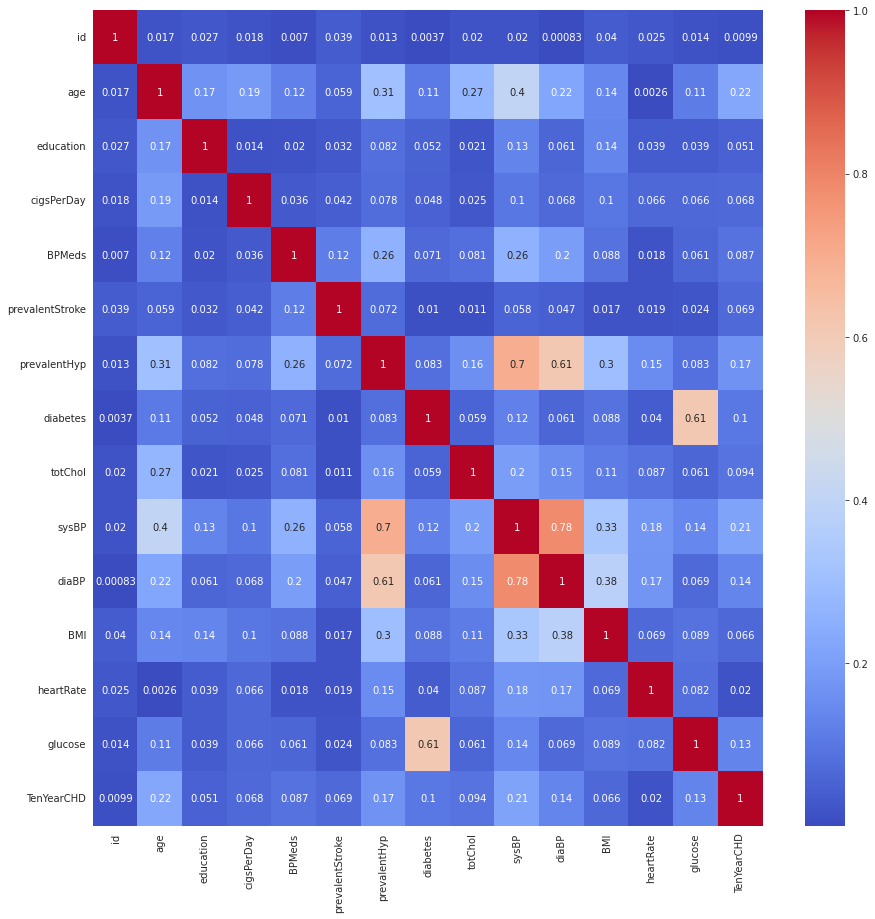

In [ ]:
 ## Correlation
plt.figure(figsize=(15,15))
correlation = df_copy.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df_copy.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
df_copy.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# One hot encoding
final_data = pd.get_dummies(df_copy, columns=["education",
                                         'sex',
                                         'is_smoking',
                                         'cigsPerDay'])

In [ ]:
final_data.head()

,id,age,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0,sex_F,sex_M,is_smoking_NO,is_smoking_YES,cigsPerDay_0.0,cigsPerDay_1.0,cigsPerDay_2.0,cigsPerDay_3.0,cigsPerDay_4.0,cigsPerDay_5.0,cigsPerDay_6.0,cigsPerDay_7.0,cigsPerDay_8.0,cigsPerDay_9.0,cigsPerDay_10.0,cigsPerDay_11.0,cigsPerDay_12.0,cigsPerDay_13.0,cigsPerDay_14.0,cigsPerDay_15.0,cigsPerDay_16.0,cigsPerDay_17.0,cigsPerDay_18.0,cigsPerDay_19.0,cigsPerDay_20.0,cigsPerDay_23.0,cigsPerDay_25.0,cigsPerDay_30.0,cigsPerDay_35.0,cigsPerDay_38.0,cigsPerDay_40.0,cigsPerDay_43.0,cigsPerDay_45.0,cigsPerDay_50.0,cigsPerDay_60.0,cigsPerDay_70.0
0,0,64,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,36,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,46,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,50,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,4,64,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
final_data.shape

(3390, 53)

Now we see corelation heatmap between each feature to choose best feature.

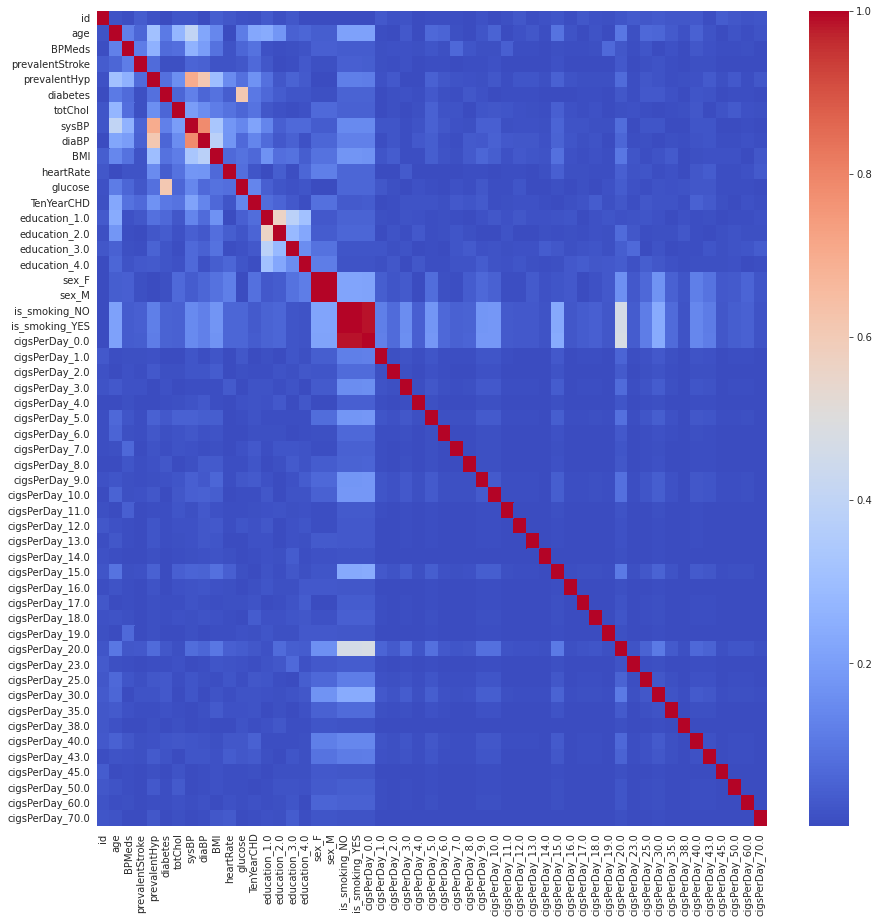

In [ ]:
 ## Correlation
plt.figure(figsize=(15,15))
correlation_1 = final_data.corr()
sns.heatmap(abs(correlation_1), cmap='coolwarm')
plt.show()

#function 

## Build model 

# splitting data into train and test

In [ ]:
# features will be saved as X and our target will be saved as y
X = final_data.drop(["TenYearCHD"], axis=1)
y = final_data['TenYearCHD']

In [ ]:
print(final_data.shape)
print(X.shape)
print(y.shape)

(3390, 53)
(3390, 52)
(3390,)


In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(2712, 52)
(678, 52)


In [ ]:
#y_train 
y_train.value_counts()

0    2305
1     407
Name: TenYearCHD, dtype: int64

In [ ]:
y_test.value_counts()

0    574
1    104
Name: TenYearCHD, dtype: int64

# logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

df = LogisticRegression(fit_intercept=True,max_iter=10000)
df.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
df.coef_

array([[-1.55113831e-05,  5.88420313e-02, -1.90303638e-01,
         1.06647124e+00,  1.60015928e-01,  1.41805991e-01,
         3.16080251e-03,  1.90656741e-02, -4.64157426e-03,
        -1.26837668e-02, -8.31479058e-03,  8.88354205e-03,
        -6.58899029e-01, -7.88132035e-01, -6.43192047e-01,
        -7.16901195e-01, -1.65051884e+00, -1.15660547e+00,
        -1.00934007e+00, -1.79778423e+00, -1.27193769e+00,
        -7.28775622e-01,  4.47270019e-02, -5.88748813e-01,
        -2.47976824e-01, -3.45278853e-01, -3.60083205e-02,
         2.73095261e-01, -6.10279865e-01, -6.74436163e-01,
         5.45618104e-02, -5.59503266e-02,  2.35283435e-01,
        -2.47590421e-01, -5.94473084e-02, -7.86387619e-02,
        -9.39779158e-02, -7.38677732e-02,  9.45911556e-02,
        -5.68640723e-02,  5.87002171e-02, -2.40954332e-02,
         8.53126543e-01,  1.06901848e-01,  1.09153796e-01,
        -4.19354385e-02,  7.85553824e-01,  3.18456873e-01,
        -5.57294534e-02, -1.81600261e-01, -2.33367180e-0

In [ ]:
df.intercept_

array([-3.41163322])

##Evaluating the performance of the trained model

In [ ]:
# Get the predicted probabilities
train_preds = df.predict_proba(X_train)
test_preds = df.predict_proba(X_test)

In [ ]:
train_class_preds = df.predict(X_train)
test_class_preds = df.predict(X_test)

In [ ]:
train_class_preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
test_class_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8609882005899705
The accuracy on test data is  0.8495575221238938


##confusion matrix

[[2290   15]
 [ 362   45]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

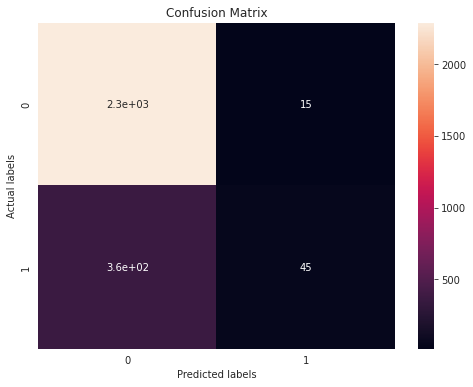

In [ ]:
# Get the confusion matrix for both train and test

labels = ['0', '1']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[568   6]
 [ 96   8]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

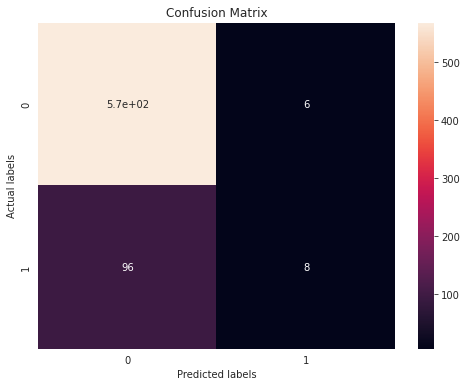

In [ ]:
# Get the confusion matrix for both train and test

labels = ['0', '1']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [155]:
y_lr_predict_pro=df.predict_proba(X_test)[:,1]
train_lr_pro = df.predict_proba(X_train)

In [122]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_lr_predict_pro)

In [157]:
print(f'Logistic ROC AUC {roc_auc_score(y_test,y_lr_predict_pro)}')

Logistic ROC AUC 0.6784374162422944


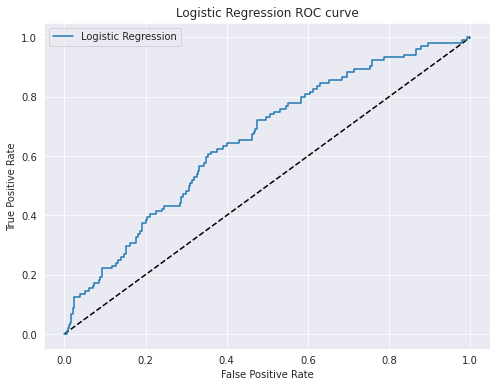

In [162]:
#plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.legend()
plt.show()

## cross validated logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [114]:
logistic = LogisticRegression(fit_intercept=True, max_iter=10000)

In [115]:
scoring = ['accuracy']
scores = cross_validate(logistic,X_train, 
                        y_train,
                        scoring = scoring,
                        cv = 5,
                        return_train_score=True,
                        return_estimator=True,
                        verbose = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ............. , accuracy=(train=0.861, test=0.862), total=   1.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] ............. , accuracy=(train=0.861, test=0.856), total=   1.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


[CV] ............. , accuracy=(train=0.859, test=0.860), total=   2.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.6s remaining:    0.0s


[CV] ............. , accuracy=(train=0.862, test=0.849), total=   2.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.0s remaining:    0.0s


[CV] ............. , accuracy=(train=0.859, test=0.863), total=   1.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.4s finished


In [117]:
scores['train_accuracy']

array([0.86122637, 0.86122637, 0.859447  , 0.86221198, 0.85898618])

In [118]:
scores['test_accuracy']

array([0.86187845, 0.85635359, 0.8597786 , 0.84870849, 0.86346863])

In [119]:
scores['estimator']

(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=10000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=10000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=10000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False)

# LIghtGBM

In [125]:
import lightgbm as lgb

In [153]:
lg = lgb.LGBMClassifier(silent=False)

In [127]:
#cv different parameter
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose=5)
grid_search.fit(train,y_train)

In [154]:
lgb_boost = grid_search.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=False,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [142]:
lgb_boost.best_estimator_


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=25,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=200, n_jobs=-1, num_leaves=300, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=False,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [143]:
y_lgb_pred = lgb_boost.predict(X_test)
y_lg_pre_prob = lgb_boost.predict_proba(X_test)[:,1]

In [144]:
lgb_boost.score(X_test,y_test)

0.6534943714821764

In [146]:
confusion_matrix(y_test,y_lgb_pred)

array([[567,   7],
       [102,   2]])

In [148]:
roc_auc_score(y_test,y_lg_pre_prob)

0.6534943714821764

In [149]:
roc_auc_score(y_test,y_lg_pre_prob)

0.6534943714821764

In [151]:
fpr, tpr, thresholds = roc_curve(y_test, y_lg_pre_prob)

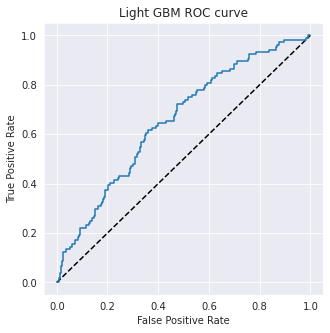

In [152]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Light GBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Light GBM ROC curve')
plt.show()

In [131]:
d_train = lgb.Dataset(X_train, label=y_train)
params = {"max_depth": 25, "learning_rate" : 0.01, "num_leaves": 300,  "n_estimators": 200}


In [133]:
from sklearn import metrics
model2 = lgb.train(params, d_train)



In [135]:
metrics.roc_auc_score(y_train, model2.predict(X_train), 
                      metrics.roc_auc_score(y_test, model2.predict(X_test)) )

ValueError: ignored